In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts

plt.close('all')

delta = 0.2

def read_data(path, n_params=8):
    df = pd.read_csv(path + 'progress.csv')
    iterations = len(df)
    batch_size = df['BatchSize']
    theta = []
    for i in range(n_params):
        theta.append([])
    for i in range(iterations):
        policy_params = np.load(path + 'weights_' + str(i) + '.npy')
        #iws = np.load(path + 'iws_' + str(i) + '.npy')
        for i in range(n_params):
            theta[i].append(policy_params[i])
    for i in range(n_params):
        df['theta%i' % (i+1)] = theta[i]
    df['CumAvgRew'] = np.cumsum(df['AvgRet'])/iterations
    return df

def plot_data(dfs, columns, bottom=-np.infty, top=np.infty, rng=None):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    if type(dfs) is not list:
        dfs = [dfs]
    n_subplots = len(dfs)
    for i in range(n_subplots): 
        df = dfs[i]
        if rng is not None:
            df = df[rng]
        ax.set_xlabel('Iteration')
        x = range(len(df))
        for col in columns:
            y = np.clip(df[col], bottom, top)
            ax.plot(x, y, label=col)
        ax.legend()
    return fig

def plot_ci(mean, std, conf, n_runs):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(mean.index, mean)
    interval = sts.t.interval(conf, n_runs-1,loc=mean,scale=std/np.sqrt(n_runs))
    ax.fill_between(mean.index, interval[0], interval[1], alpha=0.3)
    return fig

# Cartpole

## Setting:
* Policy: determinisitc linear w/o bias
* Available random seeds: 107, 583, 850, 730, 808
* Batch size: 100
* Task variant: gym
* Horizon: 200

## POIS-PE

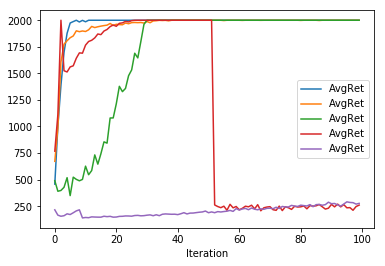

In [76]:
common_path = '../results/pgpepois/nc/cartpole/seed_'
seeds = [107, 583, 850, 730, 808]

dfs = []
for s in seeds:
    dfs.append(read_data(common_path + str(s) + '/'))
plot_data(dfs, ['AvgRet'])

In [77]:
n_iter = min(len(df) for df in dfs)
n_runs = len(dfs)
print('Number of runs:', n_runs)
print('Number of iterations per run:', n_iter)

Number of runs: 5
Number of iterations per run: 100


In [78]:
print('Columns:', list(dfs[0]))

Columns: ['AvgEpLen', 'Bound', 'MaxVanillaIw', 'AvgVanillaIw', 'VarVanillaIw', 'MinNormIw', 'MinVanillaIw', 'J', 'VarJ', 'AvgNormIw', 'AvgDiscRet', 'AvgRet', 'MaxNormIw', 'VarDiscRet', 'ESSRenyi', 'ESSClassic', 'eRenyi2', 'BatchSize', 'VarRet', 'VarNormIw', 'theta1', 'theta2', 'theta3', 'theta4', 'theta5', 'theta6', 'theta7', 'theta8', 'CumAvgRew']


In [79]:
concat_df = pd.concat(dfs, axis=1)
mean_df = pd.concat(dfs, axis=1).groupby(by=concat_df.columns, axis=1).mean()
std_df = pd.concat(dfs, axis=1).groupby(by=concat_df.columns, axis=1).std()

Average performance with 95% confidence intervals:


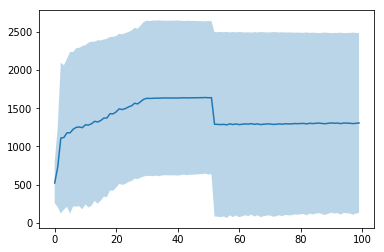

In [80]:
conf = 0.95
print('Average performance with %i%% confidence intervals:' % (conf*100))
mean = mean_df['AvgRet']
std = std_df['AvgRet']
plot_ci(mean, std, conf, n_runs)

In [81]:
cum_mean = mean_df['CumAvgRew'][len(mean_df)-1]
cum_std = std_df['CumAvgRew'][len(mean_df)-1]
interval = sts.t.interval(conf, n_runs-1,loc=cum_mean,scale=cum_std/np.sqrt(n_runs))
print('Average cumulative reward: %f, c.i. %s' % (cum_mean, interval))

Average cumulative reward: 1377.727782, c.i. (452.2447407788742, 2303.2108233164035)


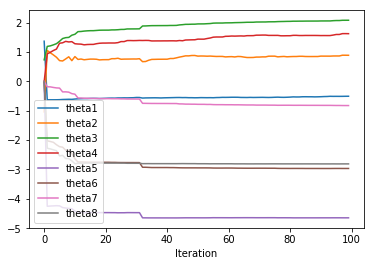

In [82]:
args = ['theta%i'%(i+1) for i in range(8)]
plot_data(dfs[0], args)

## POIS-NPE

### Cartpole

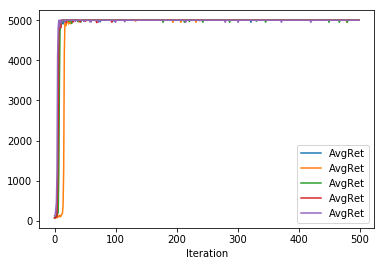

In [83]:
common_path = '../results/poisnpe/rllab_cartpole/seed_'
seeds = [583, 107, 850, 730, 808]

dfs = []
for s in seeds:
    dfs.append(read_data(common_path + str(s) + '/'))
plot_data(dfs, ['AvgRet'])

In [84]:
n_iter = min(len(df) for df in dfs)
n_runs = len(dfs)
print('Number of runs:', n_runs)
print('Number of iterations per run:', n_iter)

Number of runs: 5
Number of iterations per run: 500


In [85]:
print('Columns:', list(dfs[0]))

Columns: ['VarRet', 'MaxNormIw', 'Bound', 'BatchSize', 'MinNormIw', 'eRenyi2', 'VarNormIw', 'VarVanillaIw', 'AvgVanillaIw', 'ESSRenyi', 'ESSClassic', 'J', 'AvgNormIw', 'VarJ', 'MinVanillaIw', 'MaxVanillaIw', 'VarDiscRet', 'AvgDiscRet', 'AvgRet', 'AvgEpLen', 'theta1', 'theta2', 'theta3', 'theta4', 'theta5', 'theta6', 'theta7', 'theta8', 'CumAvgRew']


In [86]:
concat_df = pd.concat(dfs, axis=1)
mean_df = pd.concat(dfs, axis=1).groupby(by=concat_df.columns, axis=1).mean()
std_df = pd.concat(dfs, axis=1).groupby(by=concat_df.columns, axis=1).std()

Average performance with 95% confidence intervals:


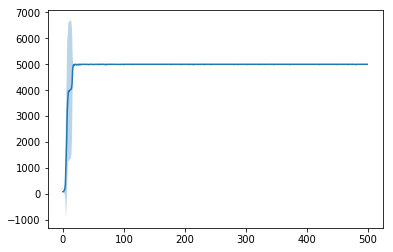

In [87]:
conf = 0.95
print('Average performance with %i%% confidence intervals:' % (conf*100))
mean = mean_df['AvgRet']
std = std_df['AvgRet']
plot_ci(mean, std, conf, n_runs)

In [88]:
cum_mean = mean_df['CumAvgRew'][len(mean_df)-1]
cum_std = std_df['CumAvgRew'][len(mean_df)-1]
interval = sts.t.interval(conf, n_runs-1,loc=cum_mean,scale=cum_std/np.sqrt(n_runs))
print('Average cumulative reward: %f, c.i. %s' % (cum_mean, interval))

Average cumulative reward: 4916.335051, c.i. (4863.62971887521, 4969.040383625746)


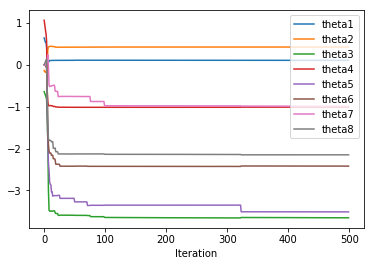

In [89]:
args = ['theta%i'%(i+1) for i in range(8)]
plot_data(dfs[0], args)

### LQG

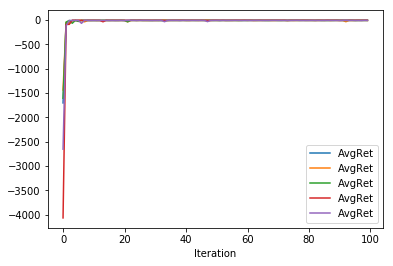

In [90]:
common_path = '../results/poisnpe/lqg/seed_'
seeds = [583, 107, 850, 730, 808]

dfs = []
for s in seeds:
    dfs.append(read_data(common_path + str(s) + '/', n_params=2))
plot_data(dfs, ['AvgRet'])

In [91]:
n_iter = min(len(df) for df in dfs)
n_runs = len(dfs)
print('Number of runs:', n_runs)
print('Number of iterations per run:', n_iter)

Number of runs: 5
Number of iterations per run: 100


In [92]:
print('Columns:', list(dfs[0]))

Columns: ['MaxVanillaIw', 'MinNormIw', 'AvgNormIw', 'MinVanillaIw', 'AvgDiscRet', 'ESSRenyi', 'VarJ', 'AvgVanillaIw', 'VarDiscRet', 'BatchSize', 'AvgRet', 'VarNormIw', 'Bound', 'ESSClassic', 'MaxNormIw', 'eRenyi2', 'AvgEpLen', 'VarVanillaIw', 'J', 'VarRet', 'theta1', 'theta2', 'CumAvgRew']


In [93]:
concat_df = pd.concat(dfs, axis=1)
mean_df = pd.concat(dfs, axis=1).groupby(by=concat_df.columns, axis=1).mean()
std_df = pd.concat(dfs, axis=1).groupby(by=concat_df.columns, axis=1).std()

Average performance with 95% confidence intervals:


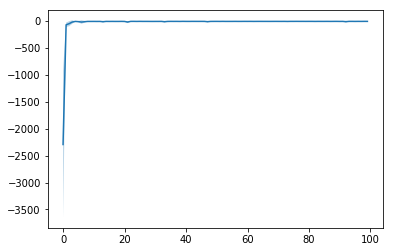

In [94]:
conf = 0.95
print('Average performance with %i%% confidence intervals:' % (conf*100))
mean = mean_df['AvgRet']
std = std_df['AvgRet']
plot_ci(mean, std, conf, n_runs)

In [95]:
cum_mean = mean_df['CumAvgRew'][len(mean_df)-1]
cum_std = std_df['CumAvgRew'][len(mean_df)-1]
interval = sts.t.interval(conf, n_runs-1,loc=cum_mean,scale=cum_std/np.sqrt(n_runs))
print('Average cumulative reward: %f, c.i. %s' % (cum_mean, interval))

Average cumulative reward: -33.738041, c.i. (-47.04464560583074, -20.431436319178403)


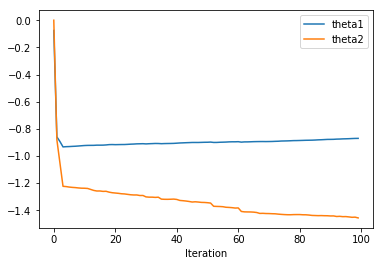

In [96]:
args = ['theta%i'%(i+1) for i in range(2)]
plot_data(dfs[0], args)

### Swimmer

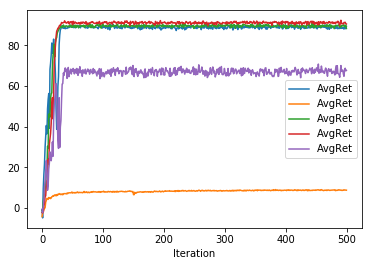

In [97]:
common_path = '../results/poisnpe/swimmer/seed_'
seeds = [583, 107, 850, 730, 808]
n_params = 52

dfs = []
for s in seeds:
    dfs.append(read_data(common_path + str(s) + '/', n_params))
plot_data(dfs, ['AvgRet'])

In [98]:
n_iter = min(len(df) for df in dfs)
n_runs = len(dfs)
print('Number of runs:', n_runs)
print('Number of iterations per run:', n_iter)

Number of runs: 5
Number of iterations per run: 500


In [99]:
print('Columns:', list(dfs[0]))

Columns: ['AvgNormIw', 'ESSRenyi', 'VarRet', 'eRenyi2', 'ESSClassic', 'J', 'AvgVanillaIw', 'AvgDiscRet', 'Bound', 'AvgEpLen', 'MinNormIw', 'AvgRet', 'MinVanillaIw', 'MaxNormIw', 'BatchSize', 'VarVanillaIw', 'MaxVanillaIw', 'VarNormIw', 'VarDiscRet', 'VarJ', 'theta1', 'theta2', 'theta3', 'theta4', 'theta5', 'theta6', 'theta7', 'theta8', 'theta9', 'theta10', 'theta11', 'theta12', 'theta13', 'theta14', 'theta15', 'theta16', 'theta17', 'theta18', 'theta19', 'theta20', 'theta21', 'theta22', 'theta23', 'theta24', 'theta25', 'theta26', 'theta27', 'theta28', 'theta29', 'theta30', 'theta31', 'theta32', 'theta33', 'theta34', 'theta35', 'theta36', 'theta37', 'theta38', 'theta39', 'theta40', 'theta41', 'theta42', 'theta43', 'theta44', 'theta45', 'theta46', 'theta47', 'theta48', 'theta49', 'theta50', 'theta51', 'theta52', 'CumAvgRew']


In [100]:
concat_df = pd.concat(dfs, axis=1)
mean_df = pd.concat(dfs, axis=1).groupby(by=concat_df.columns, axis=1).mean()
std_df = pd.concat(dfs, axis=1).groupby(by=concat_df.columns, axis=1).std()

Average performance with 95% confidence intervals:


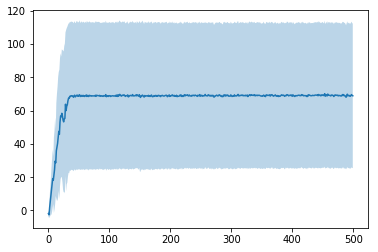

In [101]:
conf = 0.95
print('Average performance with %i%% confidence intervals:' % (conf*100))
mean = mean_df['AvgRet']
std = std_df['AvgRet']
plot_ci(mean, std, conf, n_runs)

In [102]:
cum_mean = mean_df['CumAvgRew'][len(mean_df)-1]
cum_std = std_df['CumAvgRew'][len(mean_df)-1]
interval = sts.t.interval(conf, n_runs-1,loc=cum_mean,scale=cum_std/np.sqrt(n_runs))
print('Average cumulative reward: %f, c.i. %s' % (cum_mean, interval))

Average cumulative reward: 66.936258, c.i. (24.215983740518197, 109.656532569549)


In [103]:
#args = ['theta%i'%(i+1) for i in range(n_params)]
#plot_data(dfs[0], args)